# 사전 준비

## 구글 드라이브 마운트

왼쪽에서, Google Drive 아이콘 클릭하여, Google Drive를 마운트 한 후, 다음 코드를 실행

In [2]:
import os
base_gdrive_path = os.path.join("drive", "MyDrive", "deep learning example")

# Imports

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# Fashion MNIST

## 데이터 다운 및 분석

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print("트레이닝 이미지 shape: {}, dtype: {}".format(train_images.shape, train_images.dtype))
print("트레이닝 라벨 shape: {}, dtype: {}".format(train_labels.shape, train_labels.dtype))

트레이닝 이미지 shape: (60000, 28, 28), dtype: uint8
트레이닝 라벨 shape: (60000,), dtype: uint8


In [6]:
print("테스트 이미지 shape: {}, dtype: {}".format(test_images.shape, test_images.dtype))
print("테스트 라벨 shape: {}, dtype: {}".format(test_labels.shape, test_labels.dtype))

테스트 이미지 shape: (10000, 28, 28), dtype: uint8
테스트 라벨 shape: (10000,), dtype: uint8


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리

샘플 데이터 하나 살펴보기

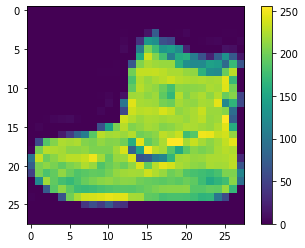

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

데이터를 비율로 변경. 트레이닝을 더 잘 시키기 위함

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

binary cmap으로 트레이닝 이미지 여러 개 살펴보기

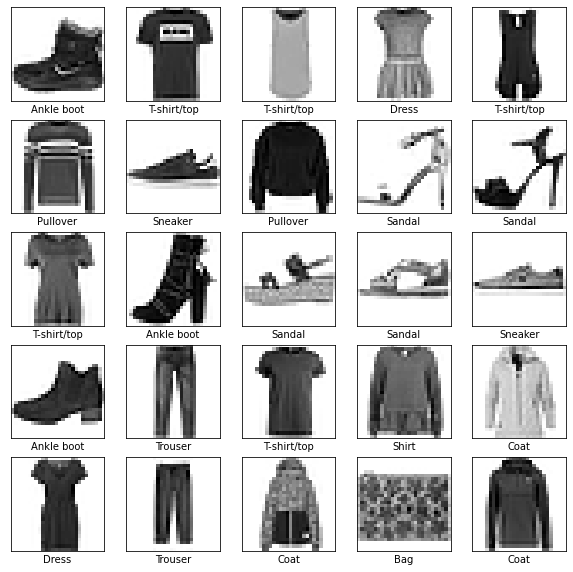

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델

### 모델 생성

In [11]:
def fashion_classification_model():
  input = keras.layers.Input((28, 28))
  flatten = keras.layers.Flatten()(input)
  dense_2 = keras.layers.Dense(10)(flatten)
  output = keras.layers.Softmax()(dense_2)

  return keras.models.Model(inputs=[input], outputs=[output])

In [12]:
model = fashion_classification_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### 모델 트레이닝

In [13]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# 'accuracy'로 넣으면, 자동으로 다음 중 하나로 전환해서 측정합니다.
# keras.metrics.BinaryAccuracy, keras.metrics.CategoricalAccuracy, keras.metrics.SparseCategoricalAccuracy

In [14]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 1ms/step - loss: 0.5987 - sparse_categorical_accuracy: 0.7974
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4616 - sparse_categorical_accuracy: 0.8417
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4354 - sparse_categorical_accuracy: 0.8504
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4215 - sparse_categorical_accuracy: 0.8548
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4139 - sparse_categorical_accuracy: 0.8567
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4065 - sparse_categorical_accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4027 - sparse_categorical_accuracy: 0.8600
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3982 - sparse_categorical_accuracy: 0.8623
Epoch 9/10
1875/1875 [==========

[0.7973666787147522,
 0.8416666388511658,
 0.850350022315979,
 0.8547666668891907,
 0.8566666841506958,
 0.8603166937828064,
 0.8599833250045776,
 0.862333357334137,
 0.8635666370391846,
 0.8641999959945679]

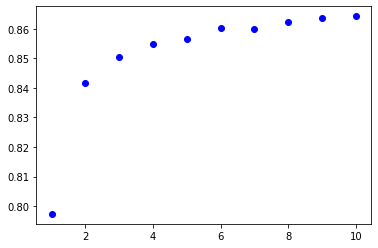

In [15]:
history_accuracy = history.history["sparse_categorical_accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.5987356901168823,
 0.4616110920906067,
 0.43543583154678345,
 0.4215031862258911,
 0.4139109253883362,
 0.4064996838569641,
 0.4027094841003418,
 0.3982422649860382,
 0.39438989758491516,
 0.39269009232521057]

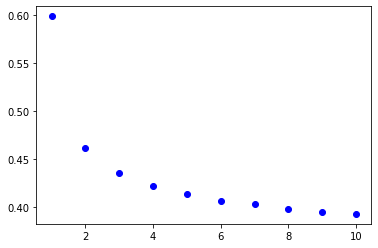

In [16]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 테스트

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.4457 - sparse_categorical_accuracy: 0.8459
테스트 정확도: 0.8458999991416931


### 모델 예측

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([7.4510092e-07, 2.2322276e-08, 1.4790760e-05, 7.6185479e-06,
       8.7266653e-06, 1.7072172e-01, 5.0804880e-05, 3.8374815e-02,
       6.5875319e-03, 7.8423315e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

### 모델 예측 그리기

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

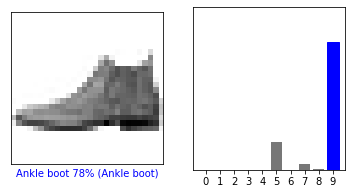

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

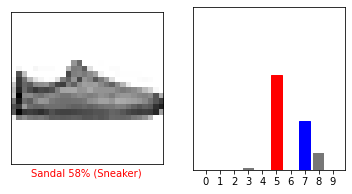

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

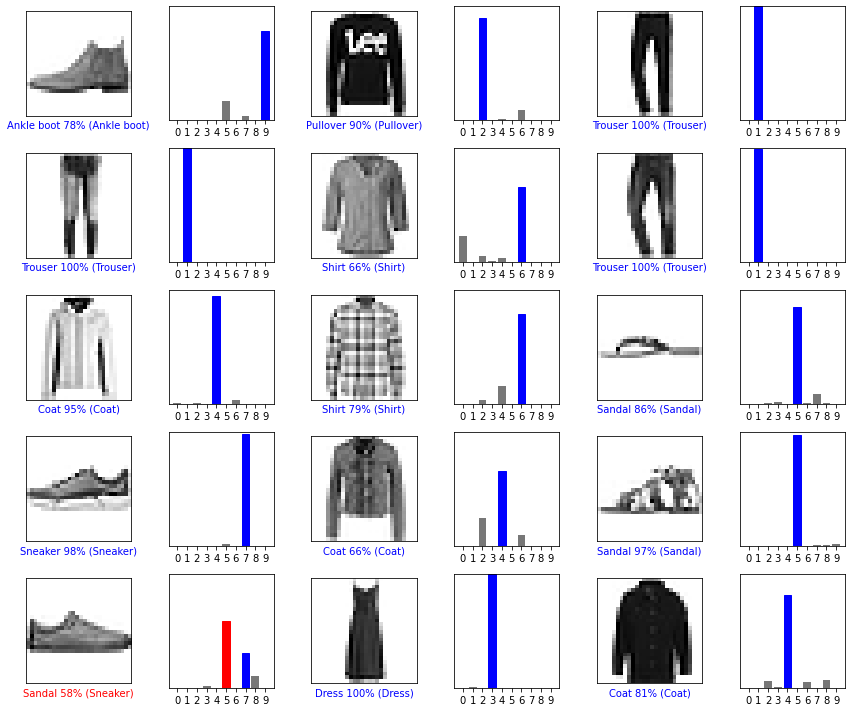

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 모델 저장, 가중치 저장 및 불러오기

In [26]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

In [27]:
from keras.models import model_from_json
from typing import Optional

def load_model(model_name: str, with_weights_path: Optional[str] = None) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [28]:
import os
result_path = os.path.join(base_gdrive_path, "results")

In [29]:
save_model(os.path.join(result_path, "model_000.json"), model)

In [30]:
import time
# run_id: str = time.strftime("%Y%m%d-%H%M%S")
run_id: str = "001"

model_weight_name: str = "model_000__{}.hdf5".format(run_id)
model.save_weights(os.path.join(result_path, model_weight_name))

In [31]:
loaded_model = load_model(os.path.join(result_path, "model_000.json"))
prediction_loaded_model = loaded_model.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model[0])))
print(prediction_loaded_model[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[7.4510092e-07 2.2322276e-08 1.4790760e-05 7.6185479e-06 8.7266653e-06
 1.7072172e-01 5.0804880e-05 3.8374815e-02 6.5875319e-03 7.8423315e-01]
불러온 모델의 예측: 9
[0.06074427 0.10852673 0.11717048 0.11131275 0.08250098 0.07425094
 0.09883036 0.05465979 0.1343946  0.15760905]
정답 :9


In [32]:
# run_id: str = "001"

# model_weight_name: str = "model_000__{}.hdf5".format(run_id)

json_model_path = os.path.join(result_path, "model_000.json")
model_weight_path = os.path.join(result_path, model_weight_name)
loaded_model_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model_with_weight = loaded_model_with_weight.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("가중치와 함께 불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model_with_weight[0])))
print(prediction_loaded_model_with_weight[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[7.4510092e-07 2.2322276e-08 1.4790760e-05 7.6185479e-06 8.7266653e-06
 1.7072172e-01 5.0804880e-05 3.8374815e-02 6.5875319e-03 7.8423315e-01]
가중치와 함께 불러온 모델의 예측: 9
[7.4510092e-07 2.2322276e-08 1.4790760e-05 7.6185479e-06 8.7266653e-06
 1.7072172e-01 5.0804880e-05 3.8374815e-02 6.5875319e-03 7.8423315e-01]
정답 :9
